# Project Process:
1. Finalise data sets (be brutal, identify roots and stems; address missing values, model missing value evaluate to mean)
2. Model linear regression statistics using OLS (feature importances; reference chicken feed/auto)
3. Prediction: random forest (predict deaths at county level using variables)
4. data visualisation (pairplots) 
5. Stretch goal: visual a key insight by geography

In [1]:
import pandas as pd

### Covid 19 Cases by County (USA Facts/CDC)

For most states, USAFacts directly collects the daily county-level cumulative totals of positive cases and deaths from a table, dashboard, or PDF on the state public health website. This data is compiled either through scraping or manual entry. The underlying data is available for download below the US county map and has helped government agencies like the Centers for Disease Control and Prevention in its nationwide efforts.

REFERENCES:
1. https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/

In [2]:
covid_cases = pd.read_csv("data/covid_confirmed_usafacts_200803.csv")

In [3]:
covid_cases.head()

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,905,921,932,942,965,974,974,1002,1015,1030
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,2461,2513,2662,2708,2770,2835,2835,3028,3101,3142
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,534,539,552,562,569,575,575,585,598,602
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,289,303,318,324,334,337,338,352,363,368


In [4]:
covid_cases_dropped = covid_cases.drop(columns=['8/1/20'])

In [5]:
covid_cases_dropped_only = covid_cases_dropped.iloc[:,-192:]

In [6]:
covid_cases_total = covid_cases_dropped['Total Cases']= covid_cases_dropped.iloc[:, -192:].sum(axis=1)

In [7]:
covid_cases_filter = covid_cases_dropped.loc[:,["countyFIPS", "County Name", "State", "stateFIPS", "Total Cases"]]
covid_cases_filter["countyFIPS"] = covid_cases_filter["countyFIPS"].astype(str)
print(covid_cases_filter.dtypes)

countyFIPS     object
County Name    object
State          object
stateFIPS       int64
Total Cases     int64
dtype: object


In [8]:
covid_cases_filter['countyFIPS_2d'] = covid_cases_filter['countyFIPS'].str[-3:]
covid_cases_filter['countyFIPS'] = covid_cases_filter['countyFIPS'].astype(str).str.zfill(5)
covid_cases_filter['countyFIPS_2d'] = covid_cases_filter['countyFIPS_2d'].astype(str).str.zfill(3)
covid_cases_filter['stateFIPS'] = covid_cases_filter['stateFIPS'].astype(str).str.zfill(2)
covid_cases_filter = covid_cases_filter.loc[:,["countyFIPS", "stateFIPS", "countyFIPS_2d", "County Name", "State", "Total Cases"]]

In [9]:
covid_cases_clean = covid_cases_filter.copy()

In [10]:
covid_cases_clean = covid_cases_clean.loc[covid_cases_clean['County Name'] != "Statewide Unallocated"]
covid_cases_clean

,countyFIPS,stateFIPS,countyFIPS_2d,County Name,State,Total Cases
1,01001,01,001,Autauga County,AL,39746
2,01003,01,003,Baldwin County,AL,76970
3,01005,01,005,Barbour County,AL,24625
4,01007,01,007,Bibb County,AL,13636
5,01009,01,009,Blount County,AL,19311
...,...,...,...,...,...,...
3190,56037,56,037,Sweetwater County,WY,7361
3191,56039,56,039,Teton County,WY,13823
3192,56041,56,041,Uinta County,WY,9737
3193,56043,56,043,Washakie County,WY,3104


In [11]:
test_cases = covid_cases_clean.loc[(covid_cases_clean["countyFIPS"] == "51560")]
test_cases

,countyFIPS,stateFIPS,countyFIPS_2d,County Name,State,Total Cases


In [12]:
null_data_cases = covid_cases_clean[covid_cases_clean.isnull().any(axis=1)]
null_data_cases

,countyFIPS,stateFIPS,countyFIPS_2d,County Name,State,Total Cases


### Covid 19 Deaths by County (USA Facts/CDC)

For most states, USAFacts directly collects the daily county-level cumulative totals of positive cases and deaths from a table, dashboard, or PDF on the state public health website. This data is compiled either through scraping or manual entry. The underlying data is available for download below the US county map and has helped government agencies like the Centers for Disease Control and Prevention in its nationwide efforts.

REFERENCES:
1. https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/

In [13]:
covid_deaths = pd.read_csv("data/covid_deaths_usafacts_200803.csv")

In [14]:
covid_deaths_dropped = covid_deaths.drop(columns=['8/1/20'])

In [15]:
covid_deaths_total = covid_deaths_dropped['Total Deaths']= covid_deaths_dropped.iloc[:, -192:].sum(axis=1)

In [16]:
covid_deaths_filter = covid_deaths_dropped.loc[:,["countyFIPS", "County Name", "State", "stateFIPS", "Total Deaths"]]

In [17]:
covid_deaths_filter = covid_deaths_dropped.loc[:,["countyFIPS", "County Name", "State", "stateFIPS", "Total Deaths"]]
covid_deaths_filter["countyFIPS"] = covid_deaths_filter["countyFIPS"].astype(str)
print(covid_deaths_filter.dtypes)

countyFIPS      object
County Name     object
State           object
stateFIPS        int64
Total Deaths     int64
dtype: object


In [18]:
covid_deaths_filter['countyFIPS_2d'] = covid_deaths_filter['countyFIPS'].str[-3:]
covid_deaths_filter['countyFIPS'] = covid_deaths_filter['countyFIPS'].astype(str).str.zfill(5)
covid_deaths_filter['countyFIPS_2d'] = covid_deaths_filter['countyFIPS_2d'].astype(str).str.zfill(3)
covid_deaths_filter['stateFIPS'] = covid_deaths_filter['stateFIPS'].astype(str).str.zfill(2)
covid_deaths_filter = covid_deaths_filter.loc[:,["countyFIPS", "stateFIPS", "countyFIPS_2d", "County Name", "State", "Total Deaths"]]
covid_deaths_filter

,countyFIPS,stateFIPS,countyFIPS_2d,County Name,State,Total Deaths
0,00000,01,000,Statewide Unallocated,AL,0
1,01001,01,001,Autauga County,AL,909
2,01003,01,003,Baldwin County,AL,958
3,01005,01,005,Barbour County,AL,155
4,01007,01,007,Bibb County,AL,103
...,...,...,...,...,...,...
3190,56037,56,037,Sweetwater County,WY,34
3191,56039,56,039,Teton County,WY,101
3192,56041,56,041,Uinta County,WY,0
3193,56043,56,043,Washakie County,WY,291


In [19]:
covid_deaths_clean = covid_deaths_filter.copy()
covid_deaths_clean = covid_deaths_clean.loc[covid_deaths_clean['County Name'] != "Statewide Unallocated"]

In [20]:
covid_deaths_clean.describe()
test_deaths_1 = covid_deaths_clean.loc[(covid_deaths_clean["countyFIPS"] == "15005")]
test_deaths_1

,countyFIPS,stateFIPS,countyFIPS_2d,County Name,State,Total Deaths
561,15005,15,005,Kalawao County,HI,0


In [21]:
null_data_deaths = covid_deaths_clean[covid_deaths_clean.isnull().any(axis=1)]
null_data_deaths

,countyFIPS,stateFIPS,countyFIPS_2d,County Name,State,Total Deaths


In [22]:
covid_deaths_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3146 entries, 1 to 3194
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   countyFIPS     3146 non-null   object
 1   stateFIPS      3146 non-null   object
 2   countyFIPS_2d  3146 non-null   object
 3   County Name    3146 non-null   object
 4   State          3146 non-null   object
 5   Total Deaths   3146 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 172.0+ KB


### Per capital incidence of poverty by U.S county (U.S Census)

The poverty universe is made up of persons for whom the Census Bureau can determine poverty status (either "in poverty" or "not in poverty").

REFERENCES:
1. SAIPE Model Input Data: https://www.census.gov/data/datasets/time-series/demo/saipe/model-tables.html

In [23]:
poverty = pd.read_csv("data/allpovu.csv")
poverty_all_ages = poverty.loc[:,["State FIPS code", "County FIPS code", "Name", "State Postal Code", "Poverty Universe, All Ages"]]
poverty_all_ages.rename(columns={'State FIPS code': 'stateFIPS', 'County FIPS code': 'countyFIPS_2d'}, inplace=True)
poverty_all_ages

,stateFIPS,countyFIPS_2d,Name,State Postal Code,"Poverty Universe, All Ages"
0,0,0,United States,US,319184033.0
1,1,0,Alabama,AL,4763811.0
2,1,1,Autauga County,AL,55073.0
3,1,3,Baldwin County,AL,215255.0
4,1,5,Barbour County,AL,21979.0
...,...,...,...,...,...
3196,56,37,Sweetwater County,WY,42205.0
3197,56,39,Teton County,WY,22888.0
3198,56,41,Uinta County,WY,20135.0
3199,56,43,Washakie County,WY,7735.0


In [24]:
poverty_all_ages.rename(columns={'Name': 'County Name', 'State Postal Code': 'State'}, inplace=True)
poverty_clean = poverty_all_ages.copy()
poverty_clean['countyFIPS_2d'] = poverty_clean['countyFIPS_2d'].astype(str).str.zfill(3)
poverty_clean['stateFIPS'] = poverty_clean['stateFIPS'].astype(str).str.zfill(2)
poverty_clean["countyFIPS"] = poverty_clean["stateFIPS"] + poverty_clean["countyFIPS_2d"]

In [25]:
poverty_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   stateFIPS                   3201 non-null   object 
 1   countyFIPS_2d               3201 non-null   object 
 2   County Name                 3201 non-null   object 
 3   State                       3201 non-null   object 
 4   Poverty Universe, All Ages  3193 non-null   float64
 5   countyFIPS                  3201 non-null   object 
dtypes: float64(1), object(5)
memory usage: 150.2+ KB


In [26]:
poverty_clean = poverty_clean.loc[poverty_clean['countyFIPS_2d'] != 0]

In [27]:
poverty_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3201 entries, 0 to 3200
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   stateFIPS                   3201 non-null   object 
 1   countyFIPS_2d               3201 non-null   object 
 2   County Name                 3201 non-null   object 
 3   State                       3201 non-null   object 
 4   Poverty Universe, All Ages  3193 non-null   float64
 5   countyFIPS                  3201 non-null   object 
dtypes: float64(1), object(5)
memory usage: 175.1+ KB


In [28]:
null_data_pov = poverty_clean[poverty_clean.isnull().any(axis=1)]
null_data_pov

,stateFIPS,countyFIPS_2d,County Name,State,"Poverty Universe, All Ages",countyFIPS
92,02,201,Prince of Wales-Outer Ketchikan Census Area,AK,NaN,02201
95,02,232,Skagway-Hoonah-Angoon Census Area,AK,NaN,02232
98,02,270,Wade Hampton Census Area,AK,NaN,02270
100,02,280,Wrangell-Petersburg Census Area,AK,NaN,02280
565,15,005,Kalawao County,HI,NaN,15005
2465,46,113,Shannon County,SD,NaN,46113
2969,51,515,Bedford city,VA,NaN,51515
2974,51,560,Clifton Forge,VA,NaN,51560


In [29]:
poverty_clean['Poverty Universe, All Ages'] = poverty_clean['Poverty Universe, All Ages'].fillna((poverty_clean['Poverty Universe, All Ages'].mean()))

In [30]:
poverty_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3201 entries, 0 to 3200
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   stateFIPS                   3201 non-null   object 
 1   countyFIPS_2d               3201 non-null   object 
 2   County Name                 3201 non-null   object 
 3   State                       3201 non-null   object 
 4   Poverty Universe, All Ages  3201 non-null   float64
 5   countyFIPS                  3201 non-null   object 
dtypes: float64(1), object(5)
memory usage: 175.1+ KB


In [31]:
test_pov = poverty_clean.loc[(poverty_clean["countyFIPS"] == "46102")]
test_pov

,stateFIPS,countyFIPS_2d,County Name,State,"Poverty Universe, All Ages",countyFIPS
2459,46,102,Oglala Lakota County,SD,14235.0,46102


### County Population by Racial/Ethnic Characteristics 2010-2019 (U.S. Census Bureau)

METHODOLOGY FOR THE UNITED STATES POPULATION ESTIMATES: VINTAGE 2019
Nation, States, Counties, and Puerto Rico – April 1, 2010 to July 1, 2019

Each year, the United States Census Bureau produces and publishes estimates of the population for the
nation, states, counties, state/county equivalents, and Puerto Rico.1 We estimate the resident population for
each year since the most recent decennial census by using measures of population change. The resident
population includes all people currently residing in the United States.

With each annual release of population estimates, the Population Estimates Program revises and updates the
entire time series of estimates from April 1, 2010 to July 1 of the current year, which we refer to as the
vintage year. We use the term “vintage” to denote an entire time series created with a consistent population
starting point and methodology. The release of a new vintage of estimates supersedes any previous series
and incorporates the most up-to-date input data and methodological improvements

REFERENCES:
1. Annual County Resident Population Estimates by Age, Sex, Race, and Hispanic Origin: April 1, 2010 to July 1, 2019 (https://www.census.gov/data/tables/time-series/demo/popest/2010s-counties-detail.html)
2. File Layout: https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/cc-est2019-alldata.pdf

In [32]:
race = pd.read_csv("data/cc-est2019-alldata.csv", encoding = "ISO-8859-1")

In [33]:
# race.columns.tolist()

# SELECTION - Z Value
# sum columns by race and gender 
# e.g. race["WA_MALE_TOTAL"] = race.loc[:, ["WA_MALE", "WAC_MALE"].sum()

# WA_MALE
# WAC_MALE

# WA_FEMALE
# WAC_FEMALE

# BA_MALE
# BAC_MALE

# BA_FEMALE
# BAC_FEMALE

# IA_MALE
# IAC_MALE

# IA_FEMALE
# IAC_FEMALE

# AA_MALE
# AAC_MALE 

# AA_FEMALE
# AAC_FEMALE

# NA_MALE
# NAC_MALE 

# NA_FEMALE
# NAC_FEMALE

# TOM_MALE
# TOM_FEMALE

race["WA_MALE_TOTAL"] = race.loc[:, ["WA_MALE", "WAC_MALE"]].sum(axis=1)
race["WA_FEMALE_TOTAL"] = race.loc[:, ["WA_FEMALE", "WAC_FEMALE"]].sum(axis=1)
race["BA_MALE_TOTAL"] = race.loc[:, ["BA_MALE", "BAC_MALE"]].sum(axis=1)
race["BA_FEMALE_TOTAL"] = race.loc[:, ["BA_FEMALE", "BAC_FEMALE"]].sum(axis=1)
race["IA_MALE_TOTAL"] = race.loc[:, ["IA_MALE", "IAC_MALE"]].sum(axis=1)
race["IA_FEMALE_TOTAL"] = race.loc[:, ["IA_FEMALE", "IAC_FEMALE"]].sum(axis=1)
race["AA_MALE_TOTAL"] = race.loc[:, ["AA_MALE", "AAC_MALE"]].sum(axis=1)
race["AA_FEMALE_TOTAL"] = race.loc[:, ["AA_FEMALE", "AAC_FEMALE"]].sum(axis=1)
race["NA_MALE_TOTAL"] = race.loc[:, ["NA_MALE", "NAC_MALE"]].sum(axis=1)
race["NA_FEMALE_TOTAL"] = race.loc[:, ["NA_FEMALE", "NAC_FEMALE"]].sum(axis=1)

In [34]:
race["YEAR"] = race["YEAR"].astype(int)
race

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,WA_MALE_TOTAL,WA_FEMALE_TOTAL,BA_MALE_TOTAL,BA_FEMALE_TOTAL,IA_MALE_TOTAL,IA_FEMALE_TOTAL,AA_MALE_TOTAL,AA_FEMALE_TOTAL,NA_MALE_TOTAL,NA_FEMALE_TOTAL
0,50,1,1,Alabama,Autauga County,1,0,54571,26569,28002,...,42928,44393,9263,10436,396,453,500,693,71,55
1,50,1,1,Alabama,Autauga County,1,1,3579,1866,1713,...,2890,2684,767,679,28,21,47,43,4,1
2,50,1,1,Alabama,Autauga County,1,2,3991,2001,1990,...,3091,3109,824,777,41,27,49,63,4,7
3,50,1,1,Alabama,Autauga County,1,3,4290,2171,2119,...,3352,3301,884,842,44,39,55,55,8,6
4,50,1,1,Alabama,Autauga County,1,4,4290,2213,2077,...,3292,3209,1027,868,35,27,64,45,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716371,50,56,45,Wyoming,Weston County,12,14,499,280,219,...,514,409,1,2,7,2,38,25,0,0
716372,50,56,45,Wyoming,Weston County,12,15,352,180,172,...,349,339,0,1,4,2,7,2,0,0
716373,50,56,45,Wyoming,Weston County,12,16,229,107,122,...,212,240,0,0,2,4,0,0,0,0
716374,50,56,45,Wyoming,Weston County,12,17,198,82,116,...,161,230,0,0,2,2,1,0,0,0


In [35]:
# Current is constrained to YEAR: 12 = 7/1/2019 & AGEGRP: 0 = Total

race_current = race.loc[(race['YEAR'] == 12) & (race['AGEGRP'] == 0)]
race_current.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 209 to 716357
Data columns (total 90 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SUMLEV           3142 non-null   int64 
 1   STATE            3142 non-null   int64 
 2   COUNTY           3142 non-null   int64 
 3   STNAME           3142 non-null   object
 4   CTYNAME          3142 non-null   object
 5   YEAR             3142 non-null   int64 
 6   AGEGRP           3142 non-null   int64 
 7   TOT_POP          3142 non-null   int64 
 8   TOT_MALE         3142 non-null   int64 
 9   TOT_FEMALE       3142 non-null   int64 
 10  WA_MALE          3142 non-null   int64 
 11  WA_FEMALE        3142 non-null   int64 
 12  BA_MALE          3142 non-null   int64 
 13  BA_FEMALE        3142 non-null   int64 
 14  IA_MALE          3142 non-null   int64 
 15  IA_FEMALE        3142 non-null   int64 
 16  AA_MALE          3142 non-null   int64 
 17  AA_FEMALE        3142 non-nul

In [36]:
race_current.loc[:,["STATE", "COUNTY", "STNAME", "CTYNAME", "TOT_POP", "WA_MALE_TOTAL", "WA_FEMALE_TOTAL"
               , "BA_MALE_TOTAL", "BA_FEMALE_TOTAL", "IA_MALE_TOTAL", "IA_FEMALE_TOTAL"
               , "AA_MALE_TOTAL", "AA_FEMALE_TOTAL", "NA_MALE_TOTAL", "NA_FEMALE_TOTAL"]]

,STATE,COUNTY,STNAME,CTYNAME,TOT_POP,WA_MALE_TOTAL,WA_FEMALE_TOTAL,BA_MALE_TOTAL,BA_FEMALE_TOTAL,IA_MALE_TOTAL,IA_FEMALE_TOTAL,AA_MALE_TOTAL,AA_FEMALE_TOTAL,NA_MALE_TOTAL,NA_FEMALE_TOTAL
209,1,1,Alabama,Autauga County,55869,42250,43920,10751,12270,395,446,727,879,87,75
437,1,3,Alabama,Baldwin County,223234,191540,202761,19832,21115,2721,2624,2337,3394,254,267
665,1,5,Alabama,Barbour County,24686,12906,11608,12743,11280,285,182,127,141,72,41
893,1,7,Alabama,Bibb County,22394,17635,16976,5951,3719,159,151,72,73,50,16
1121,1,9,Alabama,Blount County,57826,54866,56713,1174,1080,592,598,232,265,102,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715445,56,37,Wyoming,Sweetwater County,42343,41325,38927,828,640,881,801,516,619,97,99
715673,56,39,Wyoming,Teton County,23464,23328,21591,248,181,310,272,358,573,63,43
715901,56,41,Wyoming,Uinta County,20226,19698,19209,199,186,391,402,123,180,54,44
716129,56,43,Wyoming,Washakie County,7805,7602,7321,80,57,169,198,66,102,13,13


In [37]:
race_current.describe()

,SUMLEV,STATE,COUNTY,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,...,WA_MALE_TOTAL,WA_FEMALE_TOTAL,BA_MALE_TOTAL,BA_FEMALE_TOTAL,IA_MALE_TOTAL,IA_FEMALE_TOTAL,AA_MALE_TOTAL,AA_FEMALE_TOTAL,NA_MALE_TOTAL,NA_FEMALE_TOTAL
count,3142.0,3142.000000,3142.000000,3142.0,3142.0,3.142000e+03,3.142000e+03,3.142000e+03,3.142000e+03,3.142000e+03,...,3.142000e+03,3.142000e+03,3.142000e+03,3.142000e+03,3142.000000,3142.000000,3.142000e+03,3.142000e+03,3142.000000,3142.000000
mean,50.0,30.280076,103.572884,12.0,0.0,1.044683e+05,5.145045e+04,5.301789e+04,3.952652e+04,4.020683e+04,...,8.033665e+04,8.171576e+04,1.408558e+04,1.528941e+04,1771.046467,1772.443030,6.459161e+03,7.024877e+03,387.793125,382.213558
std,0.0,15.144339,107.704060,0.0,0.0,3.334567e+05,1.638677e+05,1.696276e+05,1.179341e+05,1.190460e+05,...,2.401430e+05,2.424334e+05,5.646954e+04,6.512335e+04,6577.875055,6677.061211,4.455279e+04,4.892902e+04,3681.779723,3625.889024
min,50.0,1.000000,1.000000,12.0,0.0,8.600000e+01,4.100000e+01,4.500000e+01,1.300000e+01,1.100000e+01,...,2.900000e+01,3.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,50.0,18.000000,35.000000,12.0,0.0,1.090250e+04,5.459750e+03,5.407250e+03,4.544250e+03,4.461750e+03,...,9.183000e+03,8.992500e+03,2.190000e+02,1.482500e+02,121.000000,115.000000,6.500000e+01,7.700000e+01,9.000000,8.000000
50%,50.0,29.000000,79.000000,12.0,0.0,2.572600e+04,1.286900e+04,1.282850e+04,1.094450e+04,1.101950e+04,...,2.210150e+04,2.229450e+04,1.278500e+03,8.390000e+02,325.000000,300.000000,2.040000e+02,2.320000e+02,28.000000,25.000000
75%,50.0,45.000000,133.000000,12.0,0.0,6.807275e+04,3.415225e+04,3.451250e+04,2.910775e+04,2.975875e+04,...,5.877825e+04,6.018950e+04,6.424000e+03,6.014000e+03,1008.750000,971.750000,9.527500e+02,1.083000e+03,108.750000,100.000000
max,50.0,56.000000,840.000000,12.0,0.0,1.003911e+07,4.949041e+06,5.090066e+06,3.552806e+06,3.545503e+06,...,7.240650e+06,7.229593e+06,1.140998e+06,1.362219e+06,188264.000000,185298.000000,1.529785e+06,1.731856e+06,171165.000000,166656.000000


In [38]:
race_current.rename(columns={'CTYNAME': 'County Name'}, inplace=True)
race_current.rename(columns={'STATE': 'stateFIPS'}, inplace=True)
race_current.rename(columns={'COUNTY': 'countyFIPS_2d'}, inplace=True)

/Users/laurindogarcia/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [39]:
race_current['countyFIPS_2d'] = race_current['countyFIPS_2d'].astype(str).str.zfill(3)
race_current['stateFIPS'] = race_current['stateFIPS'].astype(str).str.zfill(2)
race_current["countyFIPS"] = race_current["stateFIPS"] + race_current["countyFIPS_2d"]

<ipython-input-39-7ad2b8e29a73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_current['countyFIPS_2d'] = race_current['countyFIPS_2d'].astype(str).str.zfill(3)
<ipython-input-39-7ad2b8e29a73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_current['stateFIPS'] = race_current['stateFIPS'].astype(str).str.zfill(2)
<ipython-input-39-7ad2b8e29a73>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [40]:
test_race_sd = race_current.loc[(race_current["countyFIPS"] == "46102")]
test_race_sd

,SUMLEV,stateFIPS,countyFIPS_2d,STNAME,County Name,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,WA_FEMALE_TOTAL,BA_MALE_TOTAL,BA_FEMALE_TOTAL,IA_MALE_TOTAL,IA_FEMALE_TOTAL,AA_MALE_TOTAL,AA_FEMALE_TOTAL,NA_MALE_TOTAL,NA_FEMALE_TOTAL,countyFIPS
550145,50,46,102,South Dakota,Oglala Lakota County,12,0,14177,6961,7216,...,844,94,69,12904,13475,29,37,12,13,46102


In [41]:
race_clean = race_current.loc[:,["countyFIPS", "stateFIPS", "countyFIPS_2d", "STNAME", "County Name", "TOT_POP", "WA_MALE_TOTAL", "WA_FEMALE_TOTAL"
               , "BA_MALE_TOTAL", "BA_FEMALE_TOTAL", "IA_MALE_TOTAL", "IA_FEMALE_TOTAL"
               , "AA_MALE_TOTAL", "AA_FEMALE_TOTAL", "NA_MALE_TOTAL", "NA_FEMALE_TOTAL"]]

In [42]:
null_data_race = race_clean[race_clean.isnull().any(axis=1)]
null_data_race

,countyFIPS,stateFIPS,countyFIPS_2d,STNAME,County Name,TOT_POP,WA_MALE_TOTAL,WA_FEMALE_TOTAL,BA_MALE_TOTAL,BA_FEMALE_TOTAL,IA_MALE_TOTAL,IA_FEMALE_TOTAL,AA_MALE_TOTAL,AA_FEMALE_TOTAL,NA_MALE_TOTAL,NA_FEMALE_TOTAL


In [43]:
test_race = race_clean.loc[(race_clean["countyFIPS"] == "46102")]
test_race

,countyFIPS,stateFIPS,countyFIPS_2d,STNAME,County Name,TOT_POP,WA_MALE_TOTAL,WA_FEMALE_TOTAL,BA_MALE_TOTAL,BA_FEMALE_TOTAL,IA_MALE_TOTAL,IA_FEMALE_TOTAL,AA_MALE_TOTAL,AA_FEMALE_TOTAL,NA_MALE_TOTAL,NA_FEMALE_TOTAL
550145,46102,46,102,South Dakota,Oglala Lakota County,14177,889,844,94,69,12904,13475,29,37,12,13


In [44]:
race_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 209 to 716357
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   countyFIPS       3142 non-null   object
 1   stateFIPS        3142 non-null   object
 2   countyFIPS_2d    3142 non-null   object
 3   STNAME           3142 non-null   object
 4   County Name      3142 non-null   object
 5   TOT_POP          3142 non-null   int64 
 6   WA_MALE_TOTAL    3142 non-null   int64 
 7   WA_FEMALE_TOTAL  3142 non-null   int64 
 8   BA_MALE_TOTAL    3142 non-null   int64 
 9   BA_FEMALE_TOTAL  3142 non-null   int64 
 10  IA_MALE_TOTAL    3142 non-null   int64 
 11  IA_FEMALE_TOTAL  3142 non-null   int64 
 12  AA_MALE_TOTAL    3142 non-null   int64 
 13  AA_FEMALE_TOTAL  3142 non-null   int64 
 14  NA_MALE_TOTAL    3142 non-null   int64 
 15  NA_FEMALE_TOTAL  3142 non-null   int64 
dtypes: int64(11), object(5)
memory usage: 417.3+ KB


### Incidence of Pre-existing Conditions & Coverage of Flu Vaccine

People of any age with the following conditions are at increased risk of severe illness from COVID-19 (according to CDC, 17 July 17 2020:

PolicyMap worked with journalists at the New York Times to create this index assessing a county’s relative risk of its population developing severe COVID-19 symptoms. The index represents the relative risk for a high proportion of residents in each county to develop serious health complications from COVID-19 because of underlying health conditions identified by the CDC as contributing to a person’s risk of developing severe symptoms from the virus. These conditions include COPD, heart disease, high blood pressure, diabetes, and obesity.

Estimates of COPD, heart disease, high blood pressure, and diabetes and obesity prevalence at the tract and ZCTA level are from PolicyMap’s Health Outcome Estimates. Estimates of diabetes and obesity prevalence at the county level are from the CDC’s U.S. Diabetes Surveillance System.

Normalized scores were then converted to percentiles and z scores for easier interpretation. Percentiles rank counties from the lowest score to the highest on a scale of 0 to 100, where a score of 50 represents the median value. A county’s z score shows how many standard deviations above or below the average a county’s risk level falls. A score of 0.6, for example, would mean that the county has a higher risk than average, but is still within one standard deviation of the average and is therefore not unusually high. Risk categories from very low to very high are assigned based on z scores.

Constrained features to the following (according to CDC advisory 28 July, 2020):
- Serious heart conditions, such as heart failure, coronary artery disease, or cardiomyopathies (CVDINFR4, CVDCRHD4)
- Cancer (CHCOCNCR)
- Chronic kidney disease (CHCKDNY)
- COPD (CHCCOPD1)
- Obesity (BMI> 30) ( _BMI5CAT value 4; not available at county level)
- Sickle cell disease (not available)
- Solid organ transplantation 
- Type 2 diabetes mellitus (proxy; taking insulin: INSULIN)


Proxy Prevention Coverage
- Adult flu shot/spray past 12 mos (FLUSHOT6)


REFERENCES:
1. Covid 19 People with Certain Medical Conditions https://www.cdc.gov/coronavirus/2019-ncov/need-extra-precautions/people-with-medical-conditions.html?CDC_AA_refVal=https%3A%2F%2Fwww.cdc.gov%2Fcoronavirus%2F2019-ncov%2Fneed-extra-precautions%2Fgroups-at-higher-risk.html
2. Centers for Disease Control and Prevention (CDC). Behavioral Risk Factor Surveillance System Survey Data. Atlanta, Georgia: U.S. Department of Health and Human Services, Centers for Disease Control and Prevention, 2017.: https://www.cdc.gov/brfss/smart/smart_2017.html
3. Evidence used to update the list of underlying medical conditions that increase a person’s risk of severe illness from COVID-19: https://www.cdc.gov/coronavirus/2019-ncov/need-extra-precautions/evidence-table.html
4. PolicyMap Severe COVID-19 Health Risk Index: https://www.policymap.com/download-covid19-data/

In [45]:
# CDC SMART Data
# preexisting = pd.read_sas("data/llcp2018_2.xpt")
# preexisting.to_csv('data/llcp2018.csv')
# preexisting = pd.read_csv("data/MMSA2017.csv")
# preexisting["_MMSA"] = preexisting["_MMSA"].astype(str)
# print(preexisting.dtypes)
# preexisting['countyFIPS_2d'] = preexisting['_MMSA'].str[2:4]
# preexisting['stateFIPS_2d'] = preexisting['_MMSA'].str[0:2]

In [46]:
preexisting = pd.read_csv("data/risk_clean6.csv")

In [47]:
preexisting

,countyFIPS,stateFIPS,countyFIPS_2d,index_percentile,index_category
0,1001,1,1,65.42,Above Average
1,1003,1,3,68.39,Above Average
2,1005,1,5,97.09,High
3,1007,1,7,83.36,Above Average
4,1009,1,9,81.75,Above Average
...,...,...,...,...,...
3138,56037,56,37,10.42,Low
3139,56039,56,39,2.94,Very low
3140,56041,56,41,27.13,Below Average
3141,56043,56,43,32.76,Below Average


In [48]:
print(preexisting.dtypes)

countyFIPS            int64
stateFIPS             int64
countyFIPS_2d         int64
index_percentile    float64
index_category       object
dtype: object


In [49]:
preexisting.describe()

,countyFIPS,stateFIPS,countyFIPS_2d,index_percentile
count,3143.000000,3143.000000,3143.000000,3143.000000
mean,30390.372574,30.286669,103.703786,48.120646
std,15164.780323,15.146439,107.936692,181.451891
min,1001.000000,1.000000,1.000000,-9999.000000
25%,18178.000000,18.000000,35.000000,27.020000
50%,29177.000000,29.000000,79.000000,51.380000
75%,45082.000000,45.000000,133.000000,75.470000
max,56045.000000,56.000000,840.000000,100.000000


In [50]:
preexisting.rename(columns={'index_percentile': 'Risk Index'}, inplace=True)

In [51]:
preexisting["countyFIPS"] = preexisting["countyFIPS"].astype(str).str.zfill(5)
preexisting["stateFIPS"] = preexisting["stateFIPS"].astype(str).str.zfill(2)
preexisting["countyFIPS_2d"] = preexisting["countyFIPS_2d"].astype(str).str.zfill(3)

# preexisting["Risk Index"] = preexisting["Risk Index"].astype(str)

In [52]:
null_data_preexisting = preexisting[preexisting.isnull().any(axis=1)]
null_data_preexisting

,countyFIPS,stateFIPS,countyFIPS_2d,Risk Index,index_category
2916,51515,51,515,-9999.0,NaN


In [53]:
preexisting_clean = preexisting.dropna()

In [54]:
null_data_preexisting = preexisting_clean[preexisting_clean.isnull().any(axis=1)]
null_data_preexisting

,countyFIPS,stateFIPS,countyFIPS_2d,Risk Index,index_category


In [55]:
test_preexisting = preexisting_clean.loc[(preexisting_clean["countyFIPS"] == "1001")]
test_preexisting

,countyFIPS,stateFIPS,countyFIPS_2d,Risk Index,index_category


In [56]:
test_preexisting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   countyFIPS      0 non-null      object 
 1   stateFIPS       0 non-null      object 
 2   countyFIPS_2d   0 non-null      object 
 3   Risk Index      0 non-null      float64
 4   index_category  0 non-null      object 
dtypes: float64(1), object(4)
memory usage: 0.0+ bytes


### Flu Coverage (CDC Wonder)? 

## Merging DataFrames

In [57]:
merge_cases_death = covid_cases_clean.merge(covid_deaths_clean, on=["stateFIPS", "countyFIPS_2d", "countyFIPS"], how='left', validate="1:1")

In [58]:
merge_cases_death.info()
null_data_m_1 = merge_cases_death[merge_cases_death.isnull().any(axis=1)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3145 entries, 0 to 3144
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   countyFIPS     3145 non-null   object
 1   stateFIPS      3145 non-null   object
 2   countyFIPS_2d  3145 non-null   object
 3   County Name_x  3145 non-null   object
 4   State_x        3145 non-null   object
 5   Total Cases    3145 non-null   int64 
 6   County Name_y  3145 non-null   object
 7   State_y        3145 non-null   object
 8   Total Deaths   3145 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 245.7+ KB


In [59]:
def drop_y(merge_cases_death):
    # list comprehension of the cols that end with '_y'
    to_drop = [x for x in merge_cases_death if x.endswith('_y')]
    merge_cases_death.drop(to_drop, axis=1, inplace=True)

drop_y(merge_cases_death)

def rename_x(merge_cases_death):
    for col in merge_cases_death:
        if col.endswith('_x'):
            merge_cases_death.rename(columns={col:col.rstrip('_x')}, inplace=True)
rename_x(merge_cases_death)

merge_cases_death

,countyFIPS,stateFIPS,countyFIPS_2d,County Name,State,Total Cases,Total Deaths
0,01001,01,001,Autauga County,AL,39746,909
1,01003,01,003,Baldwin County,AL,76970,958
2,01005,01,005,Barbour County,AL,24625,155
3,01007,01,007,Bibb County,AL,13636,103
4,01009,01,009,Blount County,AL,19311,82
...,...,...,...,...,...,...,...
3140,56037,56,037,Sweetwater County,WY,7361,34
3141,56039,56,039,Teton County,WY,13823,101
3142,56041,56,041,Uinta County,WY,9737,0
3143,56043,56,043,Washakie County,WY,3104,291


In [60]:
merge_cases_death_pov = merge_cases_death.merge(poverty_clean, on=["stateFIPS", "countyFIPS_2d", "countyFIPS"], how='left', validate="1:1")

In [61]:
merge_cases_death_pov

,countyFIPS,stateFIPS,countyFIPS_2d,County Name_x,State_x,Total Cases,Total Deaths,County Name_y,State_y,"Poverty Universe, All Ages"
0,01001,01,001,Autauga County,AL,39746,909,Autauga County,AL,55073.0
1,01003,01,003,Baldwin County,AL,76970,958,Baldwin County,AL,215255.0
2,01005,01,005,Barbour County,AL,24625,155,Barbour County,AL,21979.0
3,01007,01,007,Bibb County,AL,13636,103,Bibb County,AL,20212.0
4,01009,01,009,Blount County,AL,19311,82,Blount County,AL,57238.0
...,...,...,...,...,...,...,...,...,...,...
3140,56037,56,037,Sweetwater County,WY,7361,34,Sweetwater County,WY,42205.0
3141,56039,56,039,Teton County,WY,13823,101,Teton County,WY,22888.0
3142,56041,56,041,Uinta County,WY,9737,0,Uinta County,WY,20135.0
3143,56043,56,043,Washakie County,WY,3104,291,Washakie County,WY,7735.0


In [62]:
def drop_y(merge_cases_death_pov):
    # list comprehension of the cols that end with '_y'
    to_drop = [x for x in merge_cases_death_pov if x.endswith('_y')]
    merge_cases_death_pov.drop(to_drop, axis=1, inplace=True)

drop_y(merge_cases_death_pov)

def rename_x(merge_cases_death_pov):
    for col in merge_cases_death_pov:
        if col.endswith('_x'):
            merge_cases_death_pov.rename(columns={col:col.rstrip('_x')}, inplace=True)
rename_x(merge_cases_death_pov)

merge_cases_death_pov

,countyFIPS,stateFIPS,countyFIPS_2d,County Name,State,Total Cases,Total Deaths,"Poverty Universe, All Ages"
0,01001,01,001,Autauga County,AL,39746,909,55073.0
1,01003,01,003,Baldwin County,AL,76970,958,215255.0
2,01005,01,005,Barbour County,AL,24625,155,21979.0
3,01007,01,007,Bibb County,AL,13636,103,20212.0
4,01009,01,009,Blount County,AL,19311,82,57238.0
...,...,...,...,...,...,...,...,...
3140,56037,56,037,Sweetwater County,WY,7361,34,42205.0
3141,56039,56,039,Teton County,WY,13823,101,22888.0
3142,56041,56,041,Uinta County,WY,9737,0,20135.0
3143,56043,56,043,Washakie County,WY,3104,291,7735.0


In [63]:
test_data_m_2 = merge_cases_death_pov.loc[(merge_cases_death_pov["countyFIPS"] == "02270")]
test_data_m_2

,countyFIPS,stateFIPS,countyFIPS_2d,County Name,State,Total Cases,Total Deaths,"Poverty Universe, All Ages"
93,02270,02,270,Wade Hampton Census Area,AK,0,0,299891.036329


In [64]:
merge_cases_death_pov.info()

null_data_m_2 = merge_cases_death_pov[merge_cases_death_pov.isnull().any(axis=1)]
null_data_m_2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3145 entries, 0 to 3144
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   countyFIPS                  3145 non-null   object 
 1   stateFIPS                   3145 non-null   object 
 2   countyFIPS_2d               3145 non-null   object 
 3   County Name                 3145 non-null   object 
 4   State                       3145 non-null   object 
 5   Total Cases                 3145 non-null   int64  
 6   Total Deaths                3145 non-null   int64  
 7   Poverty Universe, All Ages  3144 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 221.1+ KB


,countyFIPS,stateFIPS,countyFIPS_2d,County Name,State,Total Cases,Total Deaths,"Poverty Universe, All Ages"
1830,00001,36,001,New York City Unallocated/Probable,NY,739,79004,NaN


In [65]:
merge_cases_death_pov_2 = merge_cases_death_pov.dropna()

In [66]:
null_data_m_3 = merge_cases_death_pov_2[merge_cases_death_pov_2.isnull().any(axis=1)]
null_data_m_3

,countyFIPS,stateFIPS,countyFIPS_2d,County Name,State,Total Cases,Total Deaths,"Poverty Universe, All Ages"


In [67]:
merge_cases_death_pov_race = merge_cases_death_pov_2.merge(race_clean, on=[
    "stateFIPS", "countyFIPS_2d", "countyFIPS"], how='left', validate="1:1")

In [68]:
merge_cases_death_pov_race["countyFIPS"] = merge_cases_death_pov_race["countyFIPS"].astype(str).str.zfill(5)
merge_cases_death_pov_race.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3144 entries, 0 to 3143
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   countyFIPS                  3144 non-null   object 
 1   stateFIPS                   3144 non-null   object 
 2   countyFIPS_2d               3144 non-null   object 
 3   County Name_x               3144 non-null   object 
 4   State                       3144 non-null   object 
 5   Total Cases                 3144 non-null   int64  
 6   Total Deaths                3144 non-null   int64  
 7   Poverty Universe, All Ages  3144 non-null   float64
 8   STNAME                      3142 non-null   object 
 9   County Name_y               3142 non-null   object 
 10  TOT_POP                     3142 non-null   float64
 11  WA_MALE_TOTAL               3142 non-null   float64
 12  WA_FEMALE_TOTAL             3142 non-null   float64
 13  BA_MALE_TOTAL               3142 

In [69]:
def drop_y(merge_cases_death_pov_race):
    # list comprehension of the cols that end with '_y'
    to_drop = [x for x in merge_cases_death_pov_race if x.endswith('_y')]
    merge_cases_death_pov_race.drop(to_drop, axis=1, inplace=True)

drop_y(merge_cases_death_pov_race)

def rename_x(merge_cases_death_pov_race):
    for col in merge_cases_death_pov_race:
        if col.endswith('_x'):
            merge_cases_death_pov_race.rename(columns={col:col.rstrip('_x')}, inplace=True)
rename_x(merge_cases_death_pov_race)

merge_cases_death_pov_race

,countyFIPS,stateFIPS,countyFIPS_2d,County Name,State,Total Cases,Total Deaths,"Poverty Universe, All Ages",STNAME,TOT_POP,WA_MALE_TOTAL,WA_FEMALE_TOTAL,BA_MALE_TOTAL,BA_FEMALE_TOTAL,IA_MALE_TOTAL,IA_FEMALE_TOTAL,AA_MALE_TOTAL,AA_FEMALE_TOTAL,NA_MALE_TOTAL,NA_FEMALE_TOTAL
0,01001,01,001,Autauga County,AL,39746,909,55073.0,Alabama,55869.0,42250.0,43920.0,10751.0,12270.0,395.0,446.0,727.0,879.0,87.0,75.0
1,01003,01,003,Baldwin County,AL,76970,958,215255.0,Alabama,223234.0,191540.0,202761.0,19832.0,21115.0,2721.0,2624.0,2337.0,3394.0,254.0,267.0
2,01005,01,005,Barbour County,AL,24625,155,21979.0,Alabama,24686.0,12906.0,11608.0,12743.0,11280.0,285.0,182.0,127.0,141.0,72.0,41.0
3,01007,01,007,Bibb County,AL,13636,103,20212.0,Alabama,22394.0,17635.0,16976.0,5951.0,3719.0,159.0,151.0,72.0,73.0,50.0,16.0
4,01009,01,009,Blount County,AL,19311,82,57238.0,Alabama,57826.0,54866.0,56713.0,1174.0,1080.0,592.0,598.0,232.0,265.0,102.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,56037,56,037,Sweetwater County,WY,7361,34,42205.0,Wyoming,42343.0,41325.0,38927.0,828.0,640.0,881.0,801.0,516.0,619.0,97.0,99.0
3140,56039,56,039,Teton County,WY,13823,101,22888.0,Wyoming,23464.0,23328.0,21591.0,248.0,181.0,310.0,272.0,358.0,573.0,63.0,43.0
3141,56041,56,041,Uinta County,WY,9737,0,20135.0,Wyoming,20226.0,19698.0,19209.0,199.0,186.0,391.0,402.0,123.0,180.0,54.0,44.0
3142,56043,56,043,Washakie County,WY,3104,291,7735.0,Wyoming,7805.0,7602.0,7321.0,80.0,57.0,169.0,198.0,66.0,102.0,13.0,13.0


In [70]:
merge_cases_death_pov_race.info()

null_data_m_4 = merge_cases_death_pov_race[merge_cases_death_pov_race.isnull().any(axis=1)]
null_data_m_4

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3144 entries, 0 to 3143
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   countyFIPS                  3144 non-null   object 
 1   stateFIPS                   3144 non-null   object 
 2   countyFIPS_2d               3144 non-null   object 
 3   County Name                 3144 non-null   object 
 4   State                       3144 non-null   object 
 5   Total Cases                 3144 non-null   int64  
 6   Total Deaths                3144 non-null   int64  
 7   Poverty Universe, All Ages  3144 non-null   float64
 8   STNAME                      3142 non-null   object 
 9   TOT_POP                     3142 non-null   float64
 10  WA_MALE_TOTAL               3142 non-null   float64
 11  WA_FEMALE_TOTAL             3142 non-null   float64
 12  BA_MALE_TOTAL               3142 non-null   float64
 13  BA_FEMALE_TOTAL             3142 

,countyFIPS,stateFIPS,countyFIPS_2d,County Name,State,Total Cases,Total Deaths,"Poverty Universe, All Ages",STNAME,TOT_POP,WA_MALE_TOTAL,WA_FEMALE_TOTAL,BA_MALE_TOTAL,BA_FEMALE_TOTAL,IA_MALE_TOTAL,IA_FEMALE_TOTAL,AA_MALE_TOTAL,AA_FEMALE_TOTAL,NA_MALE_TOTAL,NA_FEMALE_TOTAL
93,02270,02,270,Wade Hampton Census Area,AK,0,0,2.998910e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,06000,06,000,Grand Princess Cruise Ship,CA,3087,0,3.881853e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
merge_cases_death_pov_race_2 = merge_cases_death_pov_race.dropna()


test_data_m_5 = merge_cases_death_pov_race_2.loc[(merge_cases_death_pov_race_2["countyFIPS"] == "06000")]
test_data_m_5

,countyFIPS,stateFIPS,countyFIPS_2d,County Name,State,Total Cases,Total Deaths,"Poverty Universe, All Ages",STNAME,TOT_POP,WA_MALE_TOTAL,WA_FEMALE_TOTAL,BA_MALE_TOTAL,BA_FEMALE_TOTAL,IA_MALE_TOTAL,IA_FEMALE_TOTAL,AA_MALE_TOTAL,AA_FEMALE_TOTAL,NA_MALE_TOTAL,NA_FEMALE_TOTAL


In [72]:
# merge_cases_death_pov_race_2["countyFIPS"] = merge_cases_death_pov_race_2["countyFIPS"].astype(str).str.zfill(5)
merge_cases_death_pov_race_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 0 to 3143
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   countyFIPS                  3142 non-null   object 
 1   stateFIPS                   3142 non-null   object 
 2   countyFIPS_2d               3142 non-null   object 
 3   County Name                 3142 non-null   object 
 4   State                       3142 non-null   object 
 5   Total Cases                 3142 non-null   int64  
 6   Total Deaths                3142 non-null   int64  
 7   Poverty Universe, All Ages  3142 non-null   float64
 8   STNAME                      3142 non-null   object 
 9   TOT_POP                     3142 non-null   float64
 10  WA_MALE_TOTAL               3142 non-null   float64
 11  WA_FEMALE_TOTAL             3142 non-null   float64
 12  BA_MALE_TOTAL               3142 non-null   float64
 13  BA_FEMALE_TOTAL             3142 

In [73]:
merge_cases_death_pov_race_2 = merge_cases_death_pov_race_2.merge(preexisting_clean, on=["stateFIPS", "countyFIPS_2d", "countyFIPS"], how='left', validate="1:1")

In [74]:
merge_cases_death_pov_race_2

,countyFIPS,stateFIPS,countyFIPS_2d,County Name,State,Total Cases,Total Deaths,"Poverty Universe, All Ages",STNAME,TOT_POP,...,BA_MALE_TOTAL,BA_FEMALE_TOTAL,IA_MALE_TOTAL,IA_FEMALE_TOTAL,AA_MALE_TOTAL,AA_FEMALE_TOTAL,NA_MALE_TOTAL,NA_FEMALE_TOTAL,Risk Index,index_category
0,01001,01,001,Autauga County,AL,39746,909,55073.0,Alabama,55869.0,...,10751.0,12270.0,395.0,446.0,727.0,879.0,87.0,75.0,65.42,Above Average
1,01003,01,003,Baldwin County,AL,76970,958,215255.0,Alabama,223234.0,...,19832.0,21115.0,2721.0,2624.0,2337.0,3394.0,254.0,267.0,68.39,Above Average
2,01005,01,005,Barbour County,AL,24625,155,21979.0,Alabama,24686.0,...,12743.0,11280.0,285.0,182.0,127.0,141.0,72.0,41.0,97.09,High
3,01007,01,007,Bibb County,AL,13636,103,20212.0,Alabama,22394.0,...,5951.0,3719.0,159.0,151.0,72.0,73.0,50.0,16.0,83.36,Above Average
4,01009,01,009,Blount County,AL,19311,82,57238.0,Alabama,57826.0,...,1174.0,1080.0,592.0,598.0,232.0,265.0,102.0,62.0,81.75,Above Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,56,037,Sweetwater County,WY,7361,34,42205.0,Wyoming,42343.0,...,828.0,640.0,881.0,801.0,516.0,619.0,97.0,99.0,10.42,Low
3138,56039,56,039,Teton County,WY,13823,101,22888.0,Wyoming,23464.0,...,248.0,181.0,310.0,272.0,358.0,573.0,63.0,43.0,2.94,Very low
3139,56041,56,041,Uinta County,WY,9737,0,20135.0,Wyoming,20226.0,...,199.0,186.0,391.0,402.0,123.0,180.0,54.0,44.0,27.13,Below Average
3140,56043,56,043,Washakie County,WY,3104,291,7735.0,Wyoming,7805.0,...,80.0,57.0,169.0,198.0,66.0,102.0,13.0,13.0,32.76,Below Average


In [75]:
null_data_m_6 = merge_cases_death_pov_race_2[merge_cases_death_pov_race_2.isnull().any(axis=1)]
null_data_m_6

,countyFIPS,stateFIPS,countyFIPS_2d,County Name,State,Total Cases,Total Deaths,"Poverty Universe, All Ages",STNAME,TOT_POP,...,BA_MALE_TOTAL,BA_FEMALE_TOTAL,IA_MALE_TOTAL,IA_FEMALE_TOTAL,AA_MALE_TOTAL,AA_FEMALE_TOTAL,NA_MALE_TOTAL,NA_FEMALE_TOTAL,Risk Index,index_category


In [76]:
merge_cases_death_pov_race_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 0 to 3141
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   countyFIPS                  3142 non-null   object 
 1   stateFIPS                   3142 non-null   object 
 2   countyFIPS_2d               3142 non-null   object 
 3   County Name                 3142 non-null   object 
 4   State                       3142 non-null   object 
 5   Total Cases                 3142 non-null   int64  
 6   Total Deaths                3142 non-null   int64  
 7   Poverty Universe, All Ages  3142 non-null   float64
 8   STNAME                      3142 non-null   object 
 9   TOT_POP                     3142 non-null   float64
 10  WA_MALE_TOTAL               3142 non-null   float64
 11  WA_FEMALE_TOTAL             3142 non-null   float64
 12  BA_MALE_TOTAL               3142 non-null   float64
 13  BA_FEMALE_TOTAL             3142 

In [77]:
def drop_y(merge_cases_death_pov_race_2):
    # list comprehension of the cols that end with '_y'
    to_drop = [x for x in merge_cases_death_pov_race_2 if x.endswith('_y')]
    merge_cases_death_pov_race_2.drop(to_drop, axis=1, inplace=True)

drop_y(merge_cases_death_pov_race_2)

def rename_x(merge_cases_death_pov_race_2):
    for col in merge_cases_death_pov_race_2:
        if col.endswith('_x'):
            merge_cases_death_pov_race_2.rename(columns={col:col.rstrip('_x')}, inplace=True)
rename_x(merge_cases_death_pov_race_2)

merge_cases_death_pov_race_2

,countyFIPS,stateFIPS,countyFIPS_2d,County Name,State,Total Cases,Total Deaths,"Poverty Universe, All Ages",STNAME,TOT_POP,...,BA_MALE_TOTAL,BA_FEMALE_TOTAL,IA_MALE_TOTAL,IA_FEMALE_TOTAL,AA_MALE_TOTAL,AA_FEMALE_TOTAL,NA_MALE_TOTAL,NA_FEMALE_TOTAL,Risk Index,index_category
0,01001,01,001,Autauga County,AL,39746,909,55073.0,Alabama,55869.0,...,10751.0,12270.0,395.0,446.0,727.0,879.0,87.0,75.0,65.42,Above Average
1,01003,01,003,Baldwin County,AL,76970,958,215255.0,Alabama,223234.0,...,19832.0,21115.0,2721.0,2624.0,2337.0,3394.0,254.0,267.0,68.39,Above Average
2,01005,01,005,Barbour County,AL,24625,155,21979.0,Alabama,24686.0,...,12743.0,11280.0,285.0,182.0,127.0,141.0,72.0,41.0,97.09,High
3,01007,01,007,Bibb County,AL,13636,103,20212.0,Alabama,22394.0,...,5951.0,3719.0,159.0,151.0,72.0,73.0,50.0,16.0,83.36,Above Average
4,01009,01,009,Blount County,AL,19311,82,57238.0,Alabama,57826.0,...,1174.0,1080.0,592.0,598.0,232.0,265.0,102.0,62.0,81.75,Above Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,56,037,Sweetwater County,WY,7361,34,42205.0,Wyoming,42343.0,...,828.0,640.0,881.0,801.0,516.0,619.0,97.0,99.0,10.42,Low
3138,56039,56,039,Teton County,WY,13823,101,22888.0,Wyoming,23464.0,...,248.0,181.0,310.0,272.0,358.0,573.0,63.0,43.0,2.94,Very low
3139,56041,56,041,Uinta County,WY,9737,0,20135.0,Wyoming,20226.0,...,199.0,186.0,391.0,402.0,123.0,180.0,54.0,44.0,27.13,Below Average
3140,56043,56,043,Washakie County,WY,3104,291,7735.0,Wyoming,7805.0,...,80.0,57.0,169.0,198.0,66.0,102.0,13.0,13.0,32.76,Below Average


In [78]:
all_data_1 = merge_cases_death_pov_race_2.loc[:,["countyFIPS", "stateFIPS", "countyFIPS_2d","County Name", "State"
       , "Total Cases", "Total Deaths", "Poverty Universe, All Ages", "TOT_POP"
       , "WA_MALE_TOTAL", "WA_FEMALE_TOTAL", "BA_MALE_TOTAL", "BA_FEMALE_TOTAL"
       , "IA_MALE_TOTAL", "IA_FEMALE_TOTAL", "AA_MALE_TOTAL", "AA_FEMALE_TOTAL"
       , "NA_MALE_TOTAL", "NA_FEMALE_TOTAL", "Risk Index", "index_category"]]

In [79]:
all_data_2 = all_data_1.copy()
all_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 0 to 3141
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   countyFIPS                  3142 non-null   object 
 1   stateFIPS                   3142 non-null   object 
 2   countyFIPS_2d               3142 non-null   object 
 3   County Name                 3142 non-null   object 
 4   State                       3142 non-null   object 
 5   Total Cases                 3142 non-null   int64  
 6   Total Deaths                3142 non-null   int64  
 7   Poverty Universe, All Ages  3142 non-null   float64
 8   TOT_POP                     3142 non-null   float64
 9   WA_MALE_TOTAL               3142 non-null   float64
 10  WA_FEMALE_TOTAL             3142 non-null   float64
 11  BA_MALE_TOTAL               3142 non-null   float64
 12  BA_FEMALE_TOTAL             3142 non-null   float64
 13  IA_MALE_TOTAL               3142 

In [80]:
all_data_2.rename(columns={"countyFIPS" : "FIPS"
    , "County Name" : "County"
    , "State" : "State"
    , "Total Cases" : "Cases"
    , "Total Deaths" : "Deaths"
    , "Poverty Universe, All Ages" : "Poverty"
    , "TOT_POP" : "Population"
    , "WA_MALE_TOTAL" : "W_Male"
    , "WA_FEMALE_TOTAL" : "W_Female"
    , "BA_MALE_TOTAL" : "B_Male"
    , "BA_FEMALE_TOTAL" : "B_Female"
    , "IA_MALE_TOTAL" : "I_Male"
    , "IA_FEMALE_TOTAL" : "I_Female"
    , "AA_MALE_TOTAL" : "A_Male"
    , "AA_FEMALE_TOTAL" : "A_Female"
    , "NA_MALE_TOTAL" : "NH_Male"
    , "NA_FEMALE_TOTAL" : "NH_Female"
    , "Risk Index" : "Risk_Index"
    , "index_category" : "Risk_Cat"}, inplace=True)

In [81]:
all_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 0 to 3141
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FIPS           3142 non-null   object 
 1   stateFIPS      3142 non-null   object 
 2   countyFIPS_2d  3142 non-null   object 
 3   County         3142 non-null   object 
 4   State          3142 non-null   object 
 5   Cases          3142 non-null   int64  
 6   Deaths         3142 non-null   int64  
 7   Poverty        3142 non-null   float64
 8   Population     3142 non-null   float64
 9   W_Male         3142 non-null   float64
 10  W_Female       3142 non-null   float64
 11  B_Male         3142 non-null   float64
 12  B_Female       3142 non-null   float64
 13  I_Male         3142 non-null   float64
 14  I_Female       3142 non-null   float64
 15  A_Male         3142 non-null   float64
 16  A_Female       3142 non-null   float64
 17  NH_Male        3142 non-null   float64
 18  NH_Femal

In [82]:
all_data_3 = all_data_2.copy()

### Outlier Option

Attempt at outlier identification based on values that are outside of the 25th and 75th quantiles

In [83]:
all_data_3.iloc[all_data_2['Cases'].idxmax()]

FIPS                          06037
stateFIPS                        06
countyFIPS_2d                   037
County           Los Angeles County
State                            CA
Cases                       8364024
Deaths                       280901
Poverty                 9.95134e+06
Population              1.00391e+07
W_Male                  7.24065e+06
W_Female                7.22959e+06
B_Male                       903492
B_Female                     997294
I_Male                       188264
I_Female                     185298
A_Male                  1.52978e+06
A_Female                1.73186e+06
NH_Male                       51309
NH_Female                     52695
Risk_Index                     4.95
Risk_Cat                   Very low
Name: 204, dtype: object

In [84]:
from scipy import stats
import numpy as np
import seaborn as sns

X_stat_o = all_data_3.copy()
num_cols = ["Cases", "Deaths", "Poverty", "Population", "W_Male", "W_Female", "B_Male"
            , "B_Female", "I_Male", "I_Female", "A_Male", "A_Female", "NH_Male", "NH_Female"
            , "Risk_Index"]

for i in num_cols:
    # fit on training data column 
    # scale = StandardScaler().fit(X_stat_stand[[i]])
    z = np.abs(stats.zscore(X_stat_o[[i]]))
    threshold = 3
    print(np.where(z > 3))

Q1 = X_stat_o.quantile(0.25)
Q3 = X_stat_o.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
# print(X_stat_o < (Q1 - 1.5 * IQR)) | (X_stat_o > (Q3 + 1.5 * IQR))

(array([ 103,  204,  215,  218,  222,  308,  325,  362,  369,  610, 1207,
       1208, 1221, 1225, 1229, 1312, 1748, 1775, 1780, 1782, 1785, 1789,
       1793, 1830, 1851, 1857, 1858, 1868, 1870, 1871, 1879, 1887, 2294,
       2579, 2623]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
(array([ 204,  308,  309,  312,  362,  610, 1221, 1225, 1227, 1229, 1280,
       1293, 1312, 1775, 1780, 1782, 1785, 1789, 1793, 1830, 1851, 1857,
       1858, 1868, 1870, 1879, 1887, 2294]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0]))
(array([ 103,  186,  192,  204,  215,  218,  219,  221,  222,  228,  325,
        347,  362,  367,  369,  610, 1225, 1293, 1312, 1340, 1748, 1830,
       1851, 1857, 1858, 1868, 1879, 2060, 2067, 2245, 2294, 2537, 2579,
       2623, 2742, 2749, 2794, 2848, 2969]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0

Variable intended to capture all the outliers

In [85]:
X_stat_ol = X_stat_o[(z < 3).all(axis=1)]

In the end, the decision was to abandon removing outliers as data the values are indicative of the truth come from a trusted source.

### Scaling Data Option

In [86]:
from sklearn.preprocessing import StandardScaler # data standardization with  sklearn
from sklearn.preprocessing import MinMaxScaler # data normalization with sklearn
scaler = StandardScaler()

# all_data_scale_test = scaler.fit_transform(all_data_3.loc[:,['Cases', 'Deaths', 'Poverty']])
# all_data_scale_test = pd.DataFrame(all_data_scale_test, columns=['Cases', 'Deaths', 'Poverty'])

# all_data_scale_test.describe()

X_stat_stand = all_data_3.copy()
X_stat_norm = all_data_3.copy()
num_cols = ["Cases", "Deaths", "Poverty", "Population", "W_Male", "W_Female", "B_Male"
            , "B_Female", "I_Male", "I_Female", "A_Male", "A_Female", "NH_Male", "NH_Female"
            , "Risk_Index"]

for i in num_cols:
    # fit on training data column
    scale = StandardScaler().fit(X_stat_stand[[i]])
    
    # transform the training data column
    X_stat_stand[i] = scale.transform(X_stat_stand[[i]])
    
    # fit scaler on training data
    norm = MinMaxScaler().fit(X_stat_norm[[i]])
    
    # transform training data
    X_train_norm = norm.transform(X_stat_norm[[i]])
    

# Reference: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

In [87]:
X_stat_stand.describe()

,Cases,Deaths,Poverty,Population,W_Male,W_Female,B_Male,B_Female,I_Male,I_Female,A_Male,A_Female,NH_Male,NH_Female,Risk_Index
count,3.142000e+03,3.142000e+03,3.142000e+03,3.142000e+03,3.142000e+03,3.142000e+03,3.142000e+03,3.142000e+03,3.142000e+03,3.142000e+03,3.142000e+03,3.142000e+03,3.142000e+03,3.142000e+03,3.142000e+03
mean,-6.798438e-17,-1.006603e-16,-1.622933e-16,-9.982113e-18,-6.729535e-17,-2.537047e-17,-6.601445e-17,-6.775470e-18,4.847950e-17,4.406264e-17,-2.901880e-17,-1.682295e-16,-6.023720e-17,-2.004373e-17,5.551115e-17
std,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00
min,-2.006342e-01,-1.404042e-01,-3.095978e-01,-3.130810e-01,-3.344692e-01,-3.369947e-01,-2.494765e-01,-2.348135e-01,-2.692858e-01,-2.654948e-01,-1.450008e-01,-1.435957e-01,-1.053444e-01,-1.054291e-01,-1.727649e+00
25%,-1.959594e-01,-1.404042e-01,-2.777216e-01,-2.806383e-01,-2.963442e-01,-3.000199e-01,-2.455977e-01,-2.325367e-01,-2.508879e-01,-2.482689e-01,-1.435416e-01,-1.420217e-01,-1.028995e-01,-1.032224e-01,-8.621908e-01
50%,-1.816473e-01,-1.354903e-01,-2.340277e-01,-2.361772e-01,-2.425406e-01,-2.451425e-01,-2.268324e-01,-2.219282e-01,-2.198699e-01,-2.205577e-01,-1.404212e-01,-1.388534e-01,-9.773817e-02,-9.853319e-02,2.198254e-03
75%,-1.249607e-01,-1.095112e-01,-1.102096e-01,-1.091637e-01,-8.978748e-02,-8.880660e-02,-1.356980e-01,-1.424510e-01,-1.159064e-01,-1.199361e-01,-1.236126e-01,-1.214580e-01,-7.580235e-02,-7.784532e-02,8.608842e-01
max,2.189576e+01,2.766151e+01,3.003487e+01,2.979763e+01,2.982162e+01,2.948857e+01,1.995929e+01,2.068604e+01,2.835606e+01,2.749035e+01,3.419692e+01,3.525731e+01,4.639180e+01,4.586468e+01,1.735254e+00


In [88]:
X_stat_norm.describe()

,Cases,Deaths,Poverty,Population,W_Male,W_Female,B_Male,B_Female,I_Male,I_Female,A_Male,A_Female,NH_Male,NH_Female,Risk_Index
count,3.142000e+03,3142.000000,3.142000e+03,3.142000e+03,3.142000e+03,3.142000e+03,3.142000e+03,3.142000e+03,3142.000000,3142.000000,3.142000e+03,3.142000e+03,3142.000000,3142.000000,3142.000000
mean,7.594494e+04,3585.888288,1.016817e+05,1.044683e+05,8.033665e+04,8.171576e+04,1.408558e+04,1.528941e+04,1771.046467,1772.443030,6.459161e+03,7.024877e+03,387.793125,382.213558,51.318329
std,3.785847e+05,25543.821590,3.279929e+05,3.334567e+05,2.401430e+05,2.424334e+05,5.646954e+04,6.512335e+04,6577.875055,6677.061211,4.455279e+04,4.892902e+04,3681.779723,3625.889024,28.058961
min,0.000000e+00,0.000000,1.520000e+02,8.600000e+01,2.900000e+01,3.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,2.850000
25%,1.769500e+03,0.000000,1.060550e+04,1.090250e+04,9.183000e+03,8.992500e+03,2.190000e+02,1.482500e+02,121.000000,115.000000,6.500000e+01,7.700000e+01,9.000000,8.000000,27.130000
50%,7.187000e+03,125.500000,2.493450e+04,2.572600e+04,2.210150e+04,2.229450e+04,1.278500e+03,8.390000e+02,325.000000,300.000000,2.040000e+02,2.320000e+02,28.000000,25.000000,51.380000
75%,2.864425e+04,789.000000,6.553950e+04,6.807275e+04,5.877825e+04,6.018950e+04,6.424000e+03,6.014000e+03,1008.750000,971.750000,9.527500e+02,1.083000e+03,108.750000,100.000000,75.470000
max,8.364024e+06,710054.000000,9.951338e+06,1.003911e+07,7.240650e+06,7.229593e+06,1.140998e+06,1.362219e+06,188264.000000,185298.000000,1.529785e+06,1.731856e+06,171165.000000,166656.000000,100.000000


#### Pre-processed Data: Machine Learning

Correctly labelled columns of raw data

In [89]:
import numpy as np

all_data_4 = all_data_3.copy()
pop_cols = ["Cases", "Deaths", "Poverty", "Population", "W_Male", "W_Female", "B_Male"
            , "B_Female", "I_Male", "I_Female", "A_Male", "A_Female", "NH_Male", "NH_Female"]

#### Pre-processed Data: Statistical Analysis

The dataframe presents as a Poisson distribution since population data is contained. However statitical analysis using linear regression requires data to be distributed normally. The next step is to transform the population features using the natural log scale.

In [90]:
all_data_5 = all_data_4.copy()

for c in pop_cols:
    all_data_5[c] = np.log(all_data_5[c]).replace(-np.inf, 0)
    
    
all_data_5

/Users/laurindogarcia/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,FIPS,stateFIPS,countyFIPS_2d,County,State,Cases,Deaths,Poverty,Population,W_Male,...,B_Male,B_Female,I_Male,I_Female,A_Male,A_Female,NH_Male,NH_Female,Risk_Index,Risk_Cat
0,01001,01,001,Autauga County,AL,10.590264,6.812345,10.916415,10.930765,10.651360,...,9.282754,9.414913,5.978886,6.100319,6.588926,6.778785,4.465908,4.317488,65.42,Above Average
1,01003,01,003,Baldwin County,AL,11.251171,6.864848,12.279579,12.315976,12.162852,...,9.895052,9.957739,7.908755,7.872455,7.756623,8.129764,5.537334,5.587249,68.39,Above Average
2,01005,01,005,Barbour County,AL,10.111517,5.043425,9.997843,10.113992,9.465448,...,9.452737,9.330787,5.652489,5.204007,4.844187,4.948760,4.276666,3.713572,97.09,High
3,01007,01,007,Bibb County,AL,9.520469,4.634729,9.914032,10.016548,9.777641,...,8.691315,8.221210,5.068904,5.017280,4.276666,4.290459,3.912023,2.772589,83.36,Above Average
4,01009,01,009,Blount County,AL,9.868430,4.406719,10.954973,10.965194,10.912649,...,7.068172,6.984716,6.383507,6.393591,5.446737,5.579730,4.624973,4.127134,81.75,Above Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,56,037,Sweetwater County,WY,8.903951,3.526361,10.650294,10.653558,10.629223,...,6.719013,6.461468,6.781058,6.685861,6.246107,6.428105,4.574711,4.595120,10.42,Low
3138,56039,56,039,Teton County,WY,9.534089,4.615121,10.038368,10.063223,10.057410,...,5.513429,5.198497,5.736572,5.605802,5.880533,6.350886,4.143135,3.761200,2.94,Very low
3139,56041,56,041,Uinta County,WY,9.183688,0.000000,9.910215,9.914724,9.888272,...,5.293305,5.225747,5.968708,5.996452,4.812184,5.192957,3.988984,3.784190,27.13,Below Average
3140,56043,56,043,Washakie County,WY,8.040447,5.673323,8.953511,8.962520,8.936167,...,4.382027,4.043051,5.129899,5.288267,4.189655,4.624973,2.564949,2.564949,32.76,Below Average


Validating data to ensure absence of null values after transform 

In [91]:
null_data_m_7 = all_data_5[all_data_5.isnull().any(axis=1)]
null_data_m_7

,FIPS,stateFIPS,countyFIPS_2d,County,State,Cases,Deaths,Poverty,Population,W_Male,...,B_Male,B_Female,I_Male,I_Female,A_Male,A_Female,NH_Male,NH_Female,Risk_Index,Risk_Cat


## Statistical Analysis

In [92]:
all_data_5.corr()

,Cases,Deaths,Poverty,Population,W_Male,W_Female,B_Male,B_Female,I_Male,I_Female,A_Male,A_Female,NH_Male,NH_Female,Risk_Index
Cases,1.000000,0.831404,0.863333,0.870442,0.830109,0.829317,0.855902,0.854359,0.675372,0.672780,0.821229,0.816102,0.773864,0.768634,-0.147728
Deaths,0.831404,1.000000,0.752192,0.753452,0.707211,0.707504,0.767904,0.777835,0.567649,0.572033,0.714703,0.710788,0.665688,0.668661,-0.109679
Poverty,0.863333,0.752192,1.000000,0.994726,0.977495,0.977334,0.840801,0.835874,0.811566,0.812330,0.941105,0.948649,0.893172,0.896652,-0.271954
Population,0.870442,0.753452,0.994726,1.000000,0.983873,0.982604,0.849985,0.840931,0.816265,0.815136,0.943148,0.950443,0.891949,0.894597,-0.270748
W_Male,0.830109,0.707211,0.977495,0.983873,1.000000,0.998602,0.782062,0.767795,0.785402,0.782802,0.921671,0.932434,0.873083,0.876733,-0.316735
W_Female,0.829317,0.707504,0.977334,0.982604,0.998602,1.000000,0.778496,0.768960,0.777178,0.776519,0.916457,0.928951,0.867349,0.872161,-0.306520
B_Male,0.855902,0.767904,0.840801,0.849985,0.782062,0.778496,1.000000,0.980966,0.643079,0.637336,0.817367,0.804058,0.758753,0.758668,-0.036136
B_Female,0.854359,0.777835,0.835874,0.840931,0.767795,0.768960,0.980966,1.000000,0.626884,0.628263,0.808608,0.800673,0.751297,0.754782,-0.021105
I_Male,0.675372,0.567649,0.811566,0.816265,0.785402,0.777178,0.643079,0.626884,1.000000,0.990532,0.816773,0.820568,0.831538,0.828568,-0.322763
I_Female,0.672780,0.572033,0.812330,0.815136,0.782802,0.776519,0.637336,0.628263,0.990532,1.000000,0.814981,0.819945,0.829597,0.826855,-0.317931


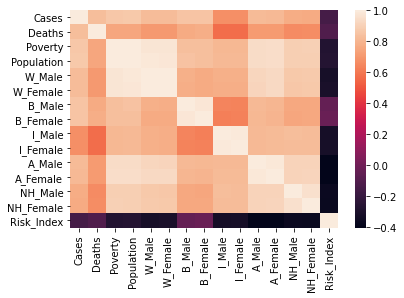

In [93]:
import seaborn as sns
sns.heatmap(all_data_5.corr())

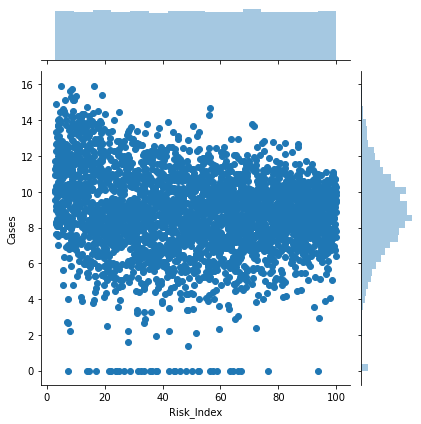

In [94]:
# sns.scatterplot(all_data_5["Risk_Index"], all_data_5["Cases"])

sns.jointplot(all_data_5["Risk_Index"], all_data_5["Cases"], data=all_data_5);


#### Plot 1. x = Risk Index (%); y = Cases (log)

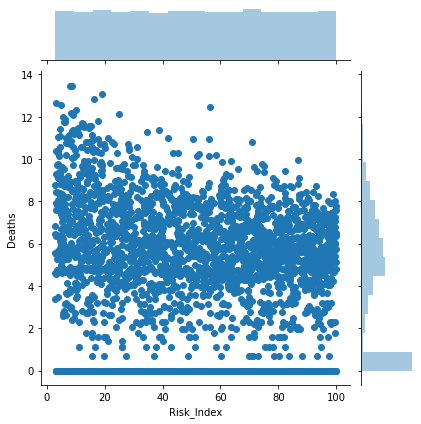

In [95]:
# sns.scatterplot(all_data_5["Risk_Index"], all_data_5["Deaths"])

sns.jointplot(all_data_5["Risk_Index"], all_data_5["Deaths"], data=all_data_5);

#### Plot 2. x = Risk Index (%); y = Deaths (log)

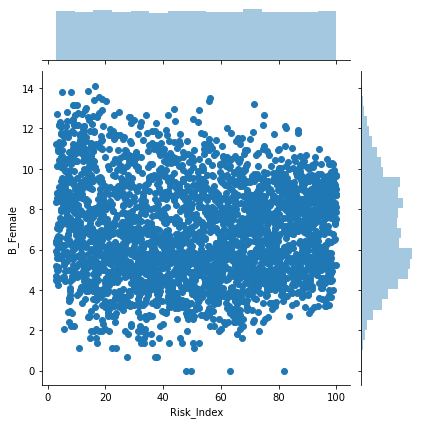

In [97]:
# sns.scatterplot(all_data_5["Risk_Index"], all_data_5["B_Female"])

sns.jointplot(all_data_5["Risk_Index"], all_data_5["B_Female"], data=all_data_5);

#### Plot 3. x = Risk Index (%); y = Black Females (log)

In [ ]:
# sns.scatterplot(all_data_5["Risk_Index"], all_data_5["Poverty"])

sns.jointplot(all_data_5["Risk_Index"], all_data_5["Poverty"], data=all_data_5);

#### Plot 4. x = Risk Index (%); y = Poverty (log)

In [ ]:
sns.distplot(all_data_5["Risk_Index"]);

#### Histogram 1. x = Risk Index (%)

In [ ]:
all_data_5.loc[:,["Risk_Index"]].describe()

#### Table. Risk Index Data Summary

In [ ]:
sns.scatterplot(all_data_5["Poverty"], all_data_5["Cases"])

#### Plot 5. x = Poverty (log); y = Cases (log)

In [119]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [ ]:
fit1 = smf.ols("Cases ~ Poverty", data=all_data_5).fit()

fit1.summary()

In [ ]:
sns.scatterplot(fit1.fittedvalues, fit1.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [ ]:
fit_all = smf.ols("Cases ~ Poverty + Population + W_Male + W_Female + B_Male + B_Female + I_Male + I_Female + A_Male + A_Female + NH_Male + NH_Female + Risk_Index", data=all_data_5).fit()

fit_all.summary()

In [ ]:
sns.scatterplot(fit_all.fittedvalues, fit_all.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [ ]:
fit_cases_v1 = smf.ols("Cases ~ Poverty + W_Male + W_Female + B_Male + B_Female", data=all_data_5).fit()

fit_cases_v1.summary()

In [ ]:
fit_cases_v2 = smf.ols("Cases ~ Poverty + B_Male + B_Female", data=all_data_5).fit()

fit_cases_v2.summary()

In [ ]:
fit_cases_v3 = smf.ols("Cases ~ Poverty + W_Female + B_Female", data=all_data_5).fit()

fit_cases_v3.summary()

In [ ]:
fit_cases_v4 = smf.ols("Cases ~ Poverty", data=all_data_5).fit()

fit_cases_v4.summary()

In [ ]:
fit_cases_v5 = smf.ols("Cases ~ Risk_Index", data=all_data_5).fit()

fit_cases_v5.summary()

In [ ]:
fit_deaths_v1 = smf.ols("Deaths ~ Poverty", data=all_data_5).fit()

fit_deaths_v1.summary()

In [124]:
fit_deaths_v2 = smf.ols("Deaths ~ B_Male + B_Female", data=all_data_5).fit()

fit_deaths_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     2411.
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:41:25   Log-Likelihood:                -6686.6
No. Observations:                3142   AIC:                         1.338e+04
Df Residuals:                    3139   BIC:                         1.340e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8996      0.123    -23.524      0.000      -3.141      -2.658
B_Male         0.1801      0.080      2.240      0.025       0.022       0.338
B_Female       0.8562      0.076     11.278      0.000       0.707       1.005
==============================================================================
Omnibus:                       13.838   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.570
Skew:                          -0.141   Prob(JB):                      0.00113
Kurtosis:                       2.846   Cond. No.                         40.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
fit_deaths_v3 = smf.ols("Deaths ~ Cases + Poverty", data=all_data_5).fit()

fit_deaths_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     3591.
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:42:33   Log-Likelihood:                -6278.4
No. Observations:                3142   AIC:                         1.256e+04
Df Residuals:                    3139   BIC:                         1.258e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.4473      0.259    -28.789      0.000      -7.954      -6.940
Cases          0.9895      0.027     36.644      0.000       0.937       1.042
Poverty        0.2925      0.042      6.928      0.000       0.210       0.375
==============================================================================
Omnibus:                       57.643   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.707
Skew:                          -0.304   Prob(JB):                     2.42e-14
Kurtosis:                       3.332   Cond. No.                         113.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
fit_deaths_v4 = smf.ols("Deaths ~ Cases + Risk_Index", data=all_data_5).fit()

fit_deaths_v4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     3517.
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:39:26   Log-Likelihood:                -6301.4
No. Observations:                3142   AIC:                         1.261e+04
Df Residuals:                    3139   BIC:                         1.263e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.9791      0.147    -40.626      0.000      -6.268      -5.691
Cases          1.1537      0.014     83.131      0.000       1.126       1.181
Risk_Index     0.0016      0.001      1.340      0.180      -0.001       0.004
==============================================================================
Omnibus:                       63.223   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.605
Skew:                          -0.236   Prob(JB):                     9.48e-20
Kurtosis:                       3.668   Cond. No.                         271.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
fit_deaths_v5 = smf.ols("Deaths ~ Cases + Poverty + B_Male + B_Female", data=all_data_5).fit()

fit_deaths_v5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     1918.
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:39:27   Log-Likelihood:                -6205.0
No. Observations:                3142   AIC:                         1.242e+04
Df Residuals:                    3137   BIC:                         1.245e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0509      0.279    -21.710      0.000      -6.597      -5.504
Cases          0.8306      0.030     27.521      0.000       0.771       0.890
Poverty        0.1173      0.045      2.617      0.009       0.029       0.205
B_Male        -0.2563      0.071     -3.628      0.000      -0.395      -0.118
B_Female       0.5266      0.066      7.990      0.000       0.397       0.656
==============================================================================
Omnibus:                       49.966   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.991
Skew:                          -0.308   Prob(JB):                     5.13e-12
Kurtosis:                       3.134   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
fit_deaths_v6 = smf.ols("Deaths ~ Cases + Risk_Index + B_Male + B_Female", data=all_data_5).fit()

fit_deaths_v6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     1914.
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:39:28   Log-Likelihood:                -6207.2
No. Observations:                3142   AIC:                         1.242e+04
Df Residuals:                    3137   BIC:                         1.245e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.2769      0.154    -34.197      0.000      -5.580      -4.974
Cases          0.8607      0.027     32.074      0.000       0.808       0.913
Risk_Index    -0.0018      0.001     -1.534      0.125      -0.004       0.000
B_Male        -0.2375      0.070     -3.384      0.001      -0.375      -0.100
B_Female       0.5440      0.066      8.203      0.000       0.414       0.674
==============================================================================
Omnibus:                       47.432   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.297
Skew:                          -0.297   Prob(JB):                     1.97e-11
Kurtosis:                       3.154   Cond. No.                         305.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Next Steps

Once dataframe is pre-processed:

1. Short list features based on correlations analysis
2. Illustrate statistical outcomes with a summary table and data viz
3. Set-up data for Random Forest Model. 
4. Select features importance measures (out-of-bag=TRUE), look for variable importance results, test and evaluate.
5. Illustrate ML results with:
a) plot coefficient tree (illustating confident intervals) with significant features highlighted by line NOT crossing dot (look for the largest coefficient?); and,
b) Scatter plot, line and confidence band.

# Machine Learning

1. Random Forest Modeling (comparing all features versus high correlation features)
2. Importances measures? (https://machinelearningmastery.com/calculate-feature-importance-with-python/)
2. Access Out Of Bag Features (https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710)

## Version 1 (All Features): Feature & Target Selection

In [98]:
all_data_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 0 to 3141
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FIPS           3142 non-null   object 
 1   stateFIPS      3142 non-null   object 
 2   countyFIPS_2d  3142 non-null   object 
 3   County         3142 non-null   object 
 4   State          3142 non-null   object 
 5   Cases          3142 non-null   int64  
 6   Deaths         3142 non-null   int64  
 7   Poverty        3142 non-null   float64
 8   Population     3142 non-null   float64
 9   W_Male         3142 non-null   float64
 10  W_Female       3142 non-null   float64
 11  B_Male         3142 non-null   float64
 12  B_Female       3142 non-null   float64
 13  I_Male         3142 non-null   float64
 14  I_Female       3142 non-null   float64
 15  A_Male         3142 non-null   float64
 16  A_Female       3142 non-null   float64
 17  NH_Male        3142 non-null   float64
 18  NH_Femal

In [127]:
y = all_data_4["Deaths"]

X = all_data_4.drop(["Deaths", "FIPS", "stateFIPS"
                     , "countyFIPS_2d", "County", "State", "Risk_Cat"],  axis=1)

X

,Cases,Poverty,Population,W_Male,W_Female,B_Male,B_Female,I_Male,I_Female,A_Male,A_Female,NH_Male,NH_Female,Risk_Index
0,39746,55073.0,55869.0,42250.0,43920.0,10751.0,12270.0,395.0,446.0,727.0,879.0,87.0,75.0,65.42
1,76970,215255.0,223234.0,191540.0,202761.0,19832.0,21115.0,2721.0,2624.0,2337.0,3394.0,254.0,267.0,68.39
2,24625,21979.0,24686.0,12906.0,11608.0,12743.0,11280.0,285.0,182.0,127.0,141.0,72.0,41.0,97.09
3,13636,20212.0,22394.0,17635.0,16976.0,5951.0,3719.0,159.0,151.0,72.0,73.0,50.0,16.0,83.36
4,19311,57238.0,57826.0,54866.0,56713.0,1174.0,1080.0,592.0,598.0,232.0,265.0,102.0,62.0,81.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,7361,42205.0,42343.0,41325.0,38927.0,828.0,640.0,881.0,801.0,516.0,619.0,97.0,99.0,10.42
3138,13823,22888.0,23464.0,23328.0,21591.0,248.0,181.0,310.0,272.0,358.0,573.0,63.0,43.0,2.94
3139,9737,20135.0,20226.0,19698.0,19209.0,199.0,186.0,391.0,402.0,123.0,180.0,54.0,44.0,27.13
3140,3104,7735.0,7805.0,7602.0,7321.0,80.0,57.0,169.0,198.0,66.0,102.0,13.0,13.0,32.76


## Train / Test Split

In [128]:
# train-test split
from sklearn.model_selection import train_test_split

# allocate 70% at random to training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Select Algorhythm

In [129]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(max_depth=2, random_state=10, oob_score=True, bootstrap=True)

## Final Model Evaluation

In [130]:
reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, oob_score=True, random_state=10)

## Feature Importances

1. https://machinelearningmastery.com/calculate-feature-importance-with-python/
2. https://towardsdatascience.com/running-random-forests-inspect-the-feature-importances-with-this-code-2b00dd72b92e
3. https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e

In [143]:
# feature_importances = pd.DataFrame(reg.feature_importances_,
#                                    index = X_train.columns,
#                                     columns=['importance']).sort_values('importance', ascending=False)

# feature_importances


# Get numerical feature importances
importances = list(reg.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Cases                Importance: 0.9
Variable: B_Male               Importance: 0.03
Variable: Population           Importance: 0.01
Variable: W_Female             Importance: 0.01
Variable: B_Female             Importance: 0.01
Variable: I_Male               Importance: 0.01
Variable: A_Female             Importance: 0.01
Variable: Risk_Index           Importance: 0.01
Variable: Poverty              Importance: 0.0
Variable: W_Male               Importance: 0.0
Variable: I_Female             Importance: 0.0
Variable: A_Male               Importance: 0.0
Variable: NH_Male              Importance: 0.0
Variable: NH_Female            Importance: 0.0


In [131]:
preds = reg.predict(X_test)

In [136]:
evaluate = pd.DataFrame({
    "actual" : y_test
    , "predicted" : preds
})

evaluate["error"] = evaluate["actual"] - evaluate["predicted"]

evaluate.head()

,actual,predicted,error
2789,0,1297.015248,-1297.015248
2970,222,1297.015248,-1075.015248
1064,337,1297.015248,-960.015248
2895,338,1297.015248,-959.015248
2989,4095,1297.015248,2797.984752


In [132]:
import numpy as np

# Calculate the absolute errors
errors = abs(preds - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 2595.27 degrees.


In [133]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -inf %.


## Version 1a (RF Most Important Features): Feature & Target Selection

Second attempt guided by feature importance data from Version 1.

In [145]:
y = all_data_4["Deaths"]

X = all_data_4.drop(["Deaths", "FIPS", "stateFIPS", "countyFIPS_2d", "County"
                     , "State", "Risk_Cat", "Poverty", "W_Male", "I_Female"
                    , "A_Male", "NH_Male", "NH_Female"],  axis=1)

X

,Cases,Population,W_Female,B_Male,B_Female,I_Male,A_Female,Risk_Index
0,39746,55869.0,43920.0,10751.0,12270.0,395.0,879.0,65.42
1,76970,223234.0,202761.0,19832.0,21115.0,2721.0,3394.0,68.39
2,24625,24686.0,11608.0,12743.0,11280.0,285.0,141.0,97.09
3,13636,22394.0,16976.0,5951.0,3719.0,159.0,73.0,83.36
4,19311,57826.0,56713.0,1174.0,1080.0,592.0,265.0,81.75
...,...,...,...,...,...,...,...,...
3137,7361,42343.0,38927.0,828.0,640.0,881.0,619.0,10.42
3138,13823,23464.0,21591.0,248.0,181.0,310.0,573.0,2.94
3139,9737,20226.0,19209.0,199.0,186.0,391.0,180.0,27.13
3140,3104,7805.0,7321.0,80.0,57.0,169.0,102.0,32.76


In [146]:
# train-test split
from sklearn.model_selection import train_test_split

# allocate 70% at random to training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [147]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(max_depth=2, random_state=10, oob_score=True, bootstrap=True)

In [148]:
reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, oob_score=True, random_state=10)

### Feature Importance

In [149]:
# Get numerical feature importances
importances = list(reg.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Cases                Importance: 0.88
Variable: B_Male               Importance: 0.04
Variable: B_Female             Importance: 0.02
Variable: A_Female             Importance: 0.02
Variable: Risk_Index           Importance: 0.02
Variable: Population           Importance: 0.01
Variable: I_Male               Importance: 0.01
Variable: W_Female             Importance: 0.0


### Prediction

In [150]:
preds = reg.predict(X_test)

### Evaluation

In [151]:
evaluate = pd.DataFrame({
    "actual" : y_test
    , "predicted" : preds
})

evaluate["error"] = evaluate["actual"] - evaluate["predicted"]

evaluate.head()

,actual,predicted,error
2789,0,1297.015248,-1297.015248
2970,222,1297.015248,-1075.015248
1064,337,1297.015248,-960.015248
2895,338,1297.015248,-959.015248
2989,4095,1297.015248,2797.984752


In [152]:
# Calculate the absolute errors
errors = abs(preds - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 2594.23 degrees.


In [153]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -inf %.


## Version 2 (Edited): Feature & Target Selection

### Select Features

In [188]:
all_data_6 = all_data_4.copy()

In [199]:
y = all_data_6["Deaths"]

X = all_data_6.drop(["Deaths", "FIPS", "stateFIPS", "Cases"
                     , "countyFIPS_2d", "County", "State", "Risk_Cat", "Population", "W_Male", "W_Female"
                     , "I_Male", "I_Female", "A_Male", "A_Female", "NH_Male", "NH_Female"],  axis=1)

X

,Poverty,B_Male,B_Female,Risk_Index
0,55073.0,10751.0,12270.0,65.42
1,215255.0,19832.0,21115.0,68.39
2,21979.0,12743.0,11280.0,97.09
3,20212.0,5951.0,3719.0,83.36
4,57238.0,1174.0,1080.0,81.75
...,...,...,...,...
3137,42205.0,828.0,640.0,10.42
3138,22888.0,248.0,181.0,2.94
3139,20135.0,199.0,186.0,27.13
3140,7735.0,80.0,57.0,32.76


In [200]:
# train-test split
from sklearn.model_selection import train_test_split

# allocate 70% at random to training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [201]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(max_depth=2, random_state=10, oob_score=True, bootstrap=True)

### Fit Training Data

In [202]:
reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, oob_score=True, random_state=10)

### Feature Importance

In [203]:
# Get numerical feature importances
importances = list(reg.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Poverty              Importance: 0.42
Variable: B_Female             Importance: 0.32
Variable: B_Male               Importance: 0.13
Variable: Risk_Index           Importance: 0.13


### Prediction

In [204]:
preds = reg.predict(X_test)

### Evaluation

In [205]:
evaluate = pd.DataFrame({
    "actual" : y_test
    , "predicted" : preds
})

evaluate["error"] = evaluate["actual"] - evaluate["predicted"]

evaluate.head()

,actual,predicted,error
2789,0,972.789504,-972.789504
2970,222,1153.617469,-931.617469
1064,337,972.789504,-635.789504
2895,338,972.789504,-634.789504
2989,4095,1153.617469,2941.382531


In [206]:
# Calculate the absolute errors
errors = abs(preds - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3419.31 degrees.


In [207]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -inf %.


# Data Visualisation
1. Correlation Heatmap
2. Confidence Intervals: 
- https://zhiyzuo.github.io/Python-Plot-Regression-Coefficient/
- https://aegis4048.github.io/comprehensive_confidence_intervals_for_python_developers
3. Scatter plot w/ line and confidence bands